In [1]:
%display latex
import numpy as np

# TP 2 Math603
Autheurs: WOOD Archie, DI MUZIO Pablo

Une partie de ce TP a été réalisée en se basant sur le TP3 de MATH203.

## Partie 1

### Exercice 1:

1. On souhaite calculer à tout instant $t$ la valeure de $r(t)$.
On connait $r(0) \in \mathbb R_+$. On peut calculer l'épaisseur de papier $S(t)$ déjà utilisée. On a
$$S(t) = \int_0^t \varepsilon v(\tau)d\tau = \pi r(0)^2 - \pi r(t)^2 \implies r(t) = \sqrt{r(0)^2 - \dfrac{\varepsilon}{\pi}\int_0^tv(\tau)d\tau}$$

2. Soit $v_c$ la lecture actuelle de la vitesse du rouleau.
On peut déduire de l'égalité précédente une approximation de $r(t)$ par la suite récurrente
$$
\begin{array}{lllr}
r_0&:=&r(0)&\\
r_{n+1}&:=& \sqrt{r_n^2-\dfrac{\varepsilon \Delta t}{\pi}v_c},&n \in [\![0,n-1]\!]
\end{array}
$$


3. On souhaite savoir quel $\Delta t$ prendre afin de ne pas surcharger le processeur. En même temps on ne peut pas juste choisir un $\Delta t$ quelconque car les erreurs d'approximation sont répercutées sur toutes la suite et donc, avoir une trop grande incertitude rendrait l'approximation caduque.

On peut dors et déjà économiser de la puissance de calculs en ne stockant que la suite des $(r_n^2)$, en effet cela nous permet de ne pas avoir à calculer la racine carrée à chaque opération et de toute façon notre récurrence remet au carré le terme précédent.
$$
\begin{cases}
r_0&:=&r(0)&\\
r_{n+1}^2&:=& {r_n^2-\dfrac{\varepsilon \Delta t}{\pi}v_c}
\end{cases}
$$

Encore une fois on peut cacher la valeur de notre produit de constantes: $\rho := -\dfrac{\varepsilon \times \Delta t}{\pi}$

$$
\begin{cases}
r_0&:=&r(0)&\\
r_{n+1}^2&:=& {r_n^2+\rho v_c}
\end{cases}
$$

On en déduit donc que le cout en cycles de création d'un élément de notre suite se décompose comme suit:
+ 3 lectures: il faut lire $r_n^2$, $\rho$ et $v_c$
+ 1 multiplications: $\rho$ multiplier avec $v_c$
+ 1 addition: sommer les deux constantes obtenues
+ 1 écriture: sauvegarder la valeur de $r_{n+1}$

Soit donc $3\times2+2\times4+2=16$ opérations entre chaque intervalle d'échantillonage.
Dans le cas où notre controlleur est ralenti par une quelconque tache et tourne donc à 500 MHz, il aurait pour valeur d'échantillonage minimale $31.25\cdot 10^{-6}s$.
On serait donc à l'aise avec une pulling rate de $30\cdot 10^{-6}s$ par sécurité.


### Exercice 2:

1. On déduit de la question 1.1 que

$$
\begin{array}{lll}
r(t)& = &\sqrt{r(0)^2 - \dfrac{\varepsilon}{\pi}\int_0^tv(\tau)d\tau} \\
\dfrac{\partial r}{\partial t} & = & \dfrac{\dfrac{\varepsilon}{\pi}v}{2\sqrt{r(0)^2 - \dfrac{\varepsilon}{\pi}\int_0^tv(\tau)d\tau}} \\
\dfrac{\partial r}{\partial t} & = & -\dfrac{\varepsilon v}{2\pi r}
\end{array}
$$

2. On construit un solveur d'Euler pour cette équation.

On a le problème de cauchy suivant
$$
\begin{cases}
\dfrac{\partial r}{\partial t} & = & - \dfrac{\varepsilon v}{2\pi r} \\
r(0) & = & r_0
\end{cases}
$$
On pose
$$
\begin{array}{}
T& \in & \mathbb R_+^* \\
N& \in & \mathbb N^* \\
I & = & [0,T] \\
h &=& \dfrac{T}{N} \\
(t_n)_{n\in \mathbb N} & \text{tq.} & t_n = nh & \forall n \in \mathbb N \\
\varphi &=& -\dfrac{\varepsilon v_c}{2\pi}
\end{array}
$$
On a alors l'approximation de la solution du problème de Cauchy $(\hat{y_n})_{0 \leqslant n \leqslant N}$ avec
$$
\begin{cases}
\hat y_0 &=& y_0\\
\hat y_{n+1} &=& \hat y_n + \dfrac{\varphi}{\hat y_n}
\end{cases}
$$

comptabilisant ainsi 33 opérations par calculs.

On en déduit que l'intervalle minimum d'échantillonage est de $15.15\cdot 10^{-6}s$, on arrondi en dessous par sécurité: $15\cdot 10^{-6}s$ 

4. Grace aux optimisations misent en place lors de l'exercice 1, cette méthode seraient moins efficace que $(\star)$ (à condition de se satisfaire des carrés dans le cas de l'exercice 1)

5. On construit un solveur du système posé au dessus.

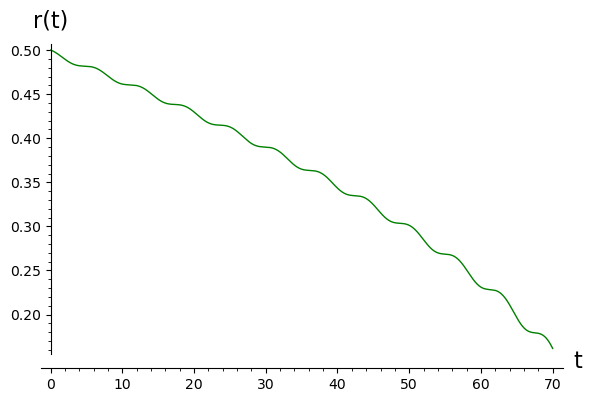

In [2]:
# Solver Euler pour dr/dt = -epsilon * v(t) / (2π r(t))

def euler_solver(v, epsilon, r0, T, dt):
    times = [0]
    values = [r0]
    
    r = r0
    t = 0
    while t < T:
        dr_dt = n(- (epsilon * v(t)) / (2 * pi * r))
        r = n(r + dt * dr_dt)
        t = n(t + dt)
        times.append(t)
        values.append(r)
    return zip(times, values)

def v_sinusoidale(t):
    return (10 + 9*sin(t))
def v_lin(t):
    return 5*t

# Paramètres:
epsilon = 0.001
r0 = 0.5
T = 70
dt = 0.01

sol_euler = list(euler_solver(v_sinusoidale, epsilon, r0, T, dt))
#Traçons la solution:
Euler = list_plot(sol_euler, plotjoined=True, color='green',axes_labels=["t", "r(t)"])
Euler

## Partie 2

### Exercice 3:

1. On remarque qu'un tableau de butcher peut être vu comme une matrice réelle.
On encode donc un tableau de Butcher
$$
\begin{array}{c|ccc}
c_1 & a_{1,1} & \cdots & a_{1,n} \\
\vdots & \vdots & \ddots & \vdots\\
c_n & a_{n,1} & \cdots & a_{n,n} \\
\hline
& b_1 & \cdots & b_n \\
\end{array} 
$$
comme la matrice $B_u \in M_{n+1}(\mathbb R)$, où
$$
A = \left(\begin{array}{c|ccc}
c_1 & a_{1,1} & \cdots & a_{1,n} \\
\vdots & \vdots & \ddots & \vdots\\
c_n & a_{n,1} & \cdots & a_{n,n} \\
\hline
0& b_1 & \cdots & b_n \\
\end{array} \right)
$$

2. Pour vérifier si il un tableau de butcher $A = (a_{i,j})_{i,j \in [\![1,} $ est consistant, il faut que l'égalité $\forall i = 2, \cdots, n; \sum_{k=2}^{n+1} a_{i,k}=a_{i,1}$. On peut donc simplement écrire le script suivant pour vérifier si un tableau de Butcher est consistant.

In [3]:
def rk_consistence(bA):
    bool_ret = True
    for i in range(bA.height() - 2):
        bool_ret = bool_ret == ((sum(bA[i,1:]) == bA[i,0]))
    return bool_ret

On teste notre code avec l'exemple du Runge-Katta d'ordre 4 donné sur wikipédia:

In [4]:
rk4 = Matrix([
    [0,0,0,0,0],
    [1/2,1/2,0,0,0],
    [1/2,0,1/2,0,0],
    [1,0,0,1,0],
    [0,1/6,1/3,1/3,1/6]
])
rk4

[  0   0   0   0   0]
[1/2 1/2   0   0   0]
[1/2   0 1/2   0   0]
[  1   0   0   1   0]
[  0 1/6 1/3 1/3 1/6]

In [5]:
rk_consistence(rk4)

True

3. On crée une fonction `generate_rk_solver` qui prend en entrée un tableau de Butcher sous la forme d'une matrice sage `Butch` et qui renvoie le solveur `solv_rk` associé à `Butch`.


In [6]:
y0_ex3 = np.array([0.5])

def generate_rk_solver(Butch):
    D = np.array(Butch, float)
    c = D[:-1, 0]
    b = D[-1, 1:]
    A = D[:-1, 1:]
    s = len(b)

    def solv_rk(t0, t1, h, f, y0):
        t = t0
        y = np.array(y0, float)
        sol = [(t, y.copy())]
        dim = len(y0)  # Dimension de y (utile pour systèmes vectoriels)
        k = np.zeros((s, dim), float)

        while t < t1:
            for i in range(s):
                ti = t + c[i] * h
                yi = y.copy()
                for j in range(i):
                    yi += h * A[i, j] * k[j]
                k[i] = f(ti, yi)

            increment = np.sum([b[i] * k[i] for i in range(s)], axis=0)
            y = y + h * increment
            t = t + h
            sol.append((t, y.copy()))

        return sol

    return solv_rk

4. On vérifie notre fonction en l'utilisant avec notre tableau `rk4` puis en comparant le plot associé à notre problème avec celui de la méthode d'Euler.

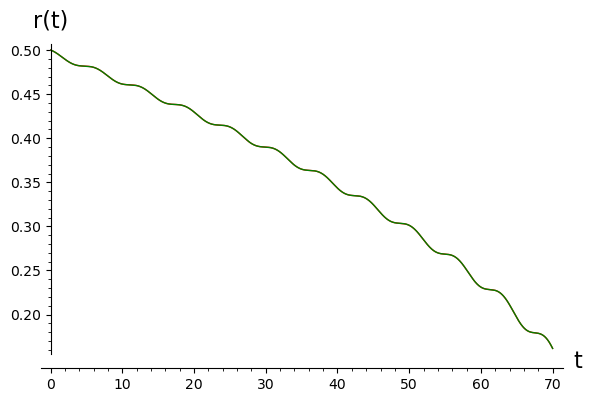

In [7]:
def f(t,y):
    return n((-epsilon*v_sinusoidale(t))/(2*pi))/y
solver_ex3 = generate_rk_solver(rk4)

def plotter(t0,t1,h,f,y0,solver=solver_ex3):
    sol = solver(t0,t1,h,f,y0)
    return list_plot(sol, plotjoined=True, color = "red")




RK_gen = plotter(0, 70, 0.1, f, y0_ex3)
RK_gen + Euler

Les deux solutions sont si proches qu'elles se superposent sur le graphe.

### Exercice 4:

On souhaite modéliser une invasion zombie à l'aide de notre nouveau plotter et solveur:

- $h$ representant le nombre d'humains
- $z$ representant le nombre de zombies
- $e$ representant le nombre de décès

à l'instant $t$. Les éliminé.e.s sont

- les zombies morts 
- les humains morts du fait des zombies (potentiellements reconvertis en zombies)
- les humains morts d'une mort autre que celle dues aux zombies

Le système modélisant cette dynamique est le suivant:
$$
h' = \Gamma - \iota h z - \delta h \\
z' = \iota h z + \zeta e - \epsilon h z \\
e' = \delta h + \epsilon h z -\zeta e
$$

où

- $\Gamma$ est le taux des naissances des humains (supposé constant)
- $\delta$ est le taux de mortalité naturel.
- $\zeta$ est le taux de zombification.

In [8]:
epsilon = 0.005
iota = 0.0095
delta = 0.0001
zeta = 0.0001
Gamma = 0.02
y0 = np.array([11,10,6])

On définit nos fonctions en réutilisant le solveur de l'exercice 3.

In [9]:
def g(t, y):
    return np.array([
        Gamma - iota * y[0] * y[1] - delta * y[0],
        iota * y[0] * y[1] + zeta * y[2] - epsilon * y[0] * y[1],
        delta * y[0] + epsilon * y[0] * y[1] - zeta * y[2]
    ])

def plot_zombies_rk4(t0=0,t1=70,h=0.1,y0=y0):
    sol = generate_rk_solver(rk4)(t0, t1, h, g, y0)
    H = list_plot(list([[sol[i][0], sol[i][1][0]] for i in range(len(sol))]), plotjoined=True, color='blue',legend_label="Humains")
    Z = list_plot(list([[sol[i][0], sol[i][1][1]] for i in range(len(sol))]), plotjoined=True, color='red',legend_label="Zombies")
    E = list_plot(list([[sol[i][0], sol[i][1][2]] for i in range(len(sol))]), plotjoined=True, color='gray',legend_label="Morts définitives")
    return H+Z+E

On a donc plus qu'à jouer avec les valeurs des variables.

#### Les zombies anéantissent les humains

La paramétrisation par défault nous fait tomber dans cette configuration.

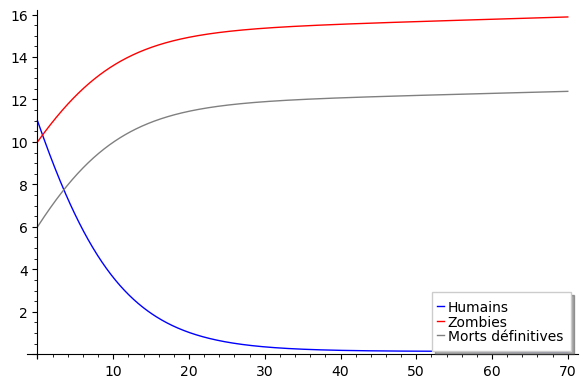

In [10]:
plot_zombies_rk4()

#### Les zombies gagnent mais les populations humaines et zombies sont toutes les deux anéanties

Pour faire en sorte que les zombies gagnent mais meurent, il faudrait avoir une cause de décès naturelle chez les zombies. Sans cela, on peut juste s'amuser à approcher les valeurs de epsilon et de iota en fixant les autres valeurs de sorte à avoir deux courbes qui semblent converger vers $0$. Le graphe du dessous n'est pas parfait et si étendu à l'infini, une population est sans doute gagante cependant il fournit une bonne approximation de ce à quoi un graphe ou les deux populations meurent simultanément suite à une victoire zombie ressemble.

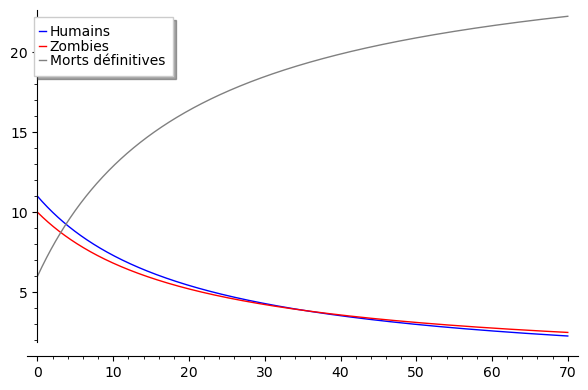

In [11]:
epsilon = 0.0093    #Humains tuant les zombies
iota = 0.005        #Zombies infectants humains
delta = 0           #Proportion de mort naturelle humaine
zeta = 0            #Resurection en zombies
Gamma = 0           #Taux de naissance
plot_zombies_rk4()

#### Les humains gagnent mais les populations humaines et zombies sont toutes les deux anéanties


Pour faire en sorte que les humains gagnent mais disparaissent, il suffit que les zombies soient tous éliminés et que les humains décèdent de causes naturelles pour que les deux camps fassent match nul. Il faut aussi s'assurer que les zombies ne puissent pas ressuciter.

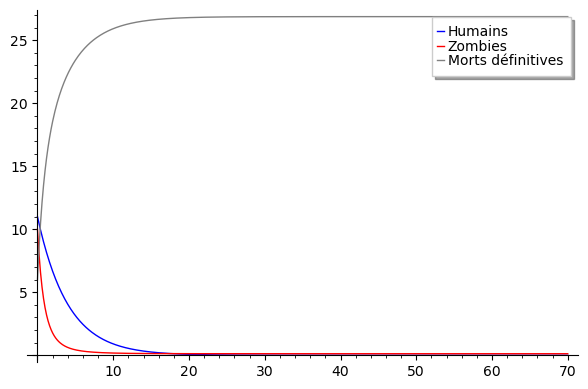

In [12]:
epsilon = 0.1        #Humains tuant les zombies
iota = 0.0           #Zombies infectants humains
delta = 0.25         #Proportion de mort naturelle humaine
zeta = 0             #Resurection en zombies
Gamma = 0            #Taux de naissance
plot_zombies_rk4()

#### Les humains gagnent et la population humaine n'est pas anéantie


Pour que les humains l'emportent sur les zombies, il suffit de fixer les paramètres qui pourrait géner la progression de notre population humaine: on empèche les zombies de ressuciter, on les rend moins dangereux que les humains et on laisse la population humaine s'en charger

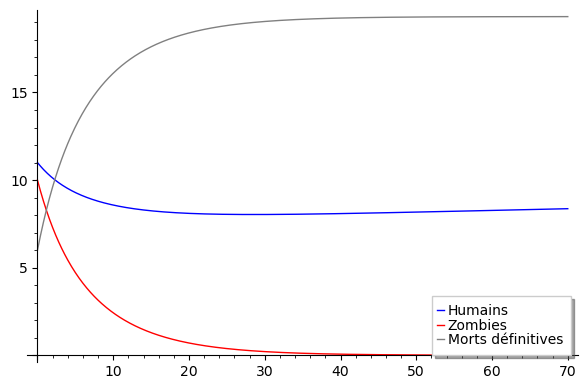

In [13]:
epsilon = 0.02       #Humains tuant les zombies
iota = 0.005         #Zombies infectants humains
delta = 0            #Proportion de mort naturelle humaine
zeta = 0             #Resurection en zombies
Gamma = 0.01         #Taux de naissance
plot_zombies_rk4()

## Partie 3:

### Exercice 5:

On se place dans la situation du problème de Cauchy suivant
$$
\begin{cases}
y' & = & f(t,y) & = & t + y^2 \\
y(0) & = & 1
\end{cases}
$$
et on cherche à calculer le $n$-ième coéfficient de Taylor à l'aide de la substitution symbolique de Sage.

On met en place les variablees dont on aura besoin:

In [14]:
t = var('t')
y = function('y')(t)
dy = diff(y,t)

Q = PolynomialRing(QQ, 't')
R = PolynomialRing(RR, 't')

On construit la fonction devTaylor pour qu'elle soit la plus générale possible comme suit (ici nous assumons que la série est entièrement rationnelle mais dans le cas ou notre fonction serait moins coopérative que celle donnée par l'exercice, comme par exemple $f(t,y) = sin(y)+t$, on pourra décommenter le premier `return` de la fonction):

In [15]:
def devTaylorY(_t0, _y0, _f,  n):
    f = _f
    
    val = [_y0]
    
    for k in range(1, n+1):
        
        val.append(f.subs({dy:_f}).subs({y:_y0}).subs({t:_t0}))
        
        f = diff(f,t).subs({dy:_f})
    
    P = sum(val[k]/factorial(k) * (t-_t0)**k for k in range(n+1))
    
    # return R(P)
    
    return Q(P)

Enfin, on ouput le résulats de notre fonction pour une valeur de test, ici `n=3`

In [16]:
devTaylorY(0,1, y**2+t,3)

4/3*t^3 + 3/2*t^2 + t + 1

On vérifie avec les résultas obtenus par le calcul et on s'assure que notre fonction est correcte.